In [1]:
import os
import datetime
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
from dotenv import load_dotenv
import urllib.parse
import matplotlib.pyplot as plt

load_dotenv()
POSTGRES_USERNAME = os.environ.get('JDB_USER')
POSTGRES_PASSWORD = os.environ.get('JDB_PASSWORD')
POSTGRES_ADDRESS = os.environ.get('JDB_HOST')
POSTGRES_PORT = 5432
POSTGRES_DBNAME = os.environ.get('JDB_NAME')
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME, password=POSTGRES_PASSWORD, ipaddress=POSTGRES_ADDRESS, port=POSTGRES_PORT, dbname=POSTGRES_DBNAME))
cnx = create_engine(postgres_str)

In [24]:
stays = pd.read_sql_query('select * from stays_summarized where is_pretrial = 1 and violation = 0 and not_primary_custodian = 0 and use_flag = 1;', cnx)
stays

,defendant_id,name,gender,race,start_date,end_date,days,max_level,is_pretrial,violent,dwi,drugs,not_primary_custodian,violation,use_flag
0,8750,"BRADY, TERRY REUBEN",M,W,2022-01-05,2022-01-05,1.0,6,1,1,0,0,0,0,1
1,8931,"LEE, MAKELA ELIZABETH",F,B,2022-01-05,2022-01-05,1.0,4,1,1,0,0,0,0,1
2,9044,"ROBINSON, PAUL CHESTER",M,W,2022-01-05,2022-01-05,1.0,5,1,0,0,1,0,0,1
3,9068,"SMILEY, BRANDY MICHELLE",F,W,2022-01-05,2022-01-06,2.0,3,1,0,0,1,0,0,1
4,8768,"BURWELL, DUSTIN LEE",M,W,2022-01-05,2022-01-08,4.0,5,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,255419,"SMITH, JOHN JR",M,B,2023-07-30,None,1.0,4,1,1,0,0,0,0,1
5453,255426,"SORENSON, AARON GABRIEL",M,W,2023-07-30,None,1.0,2,1,0,0,0,0,0,1
5454,255474,"WATSON, SHERRI JEAN",F,W,2023-07-30,None,1.0,0,1,0,0,0,0,0,1
5455,253909,"BURNS, CHRISTOPHER DAVY",M,W,2023-07-27,2023-07-29,3.0,6,1,0,0,0,0,0,1


In [25]:
b = stays.sort_values(by=["max_level"], ascending=True)
b = b.groupby("max_level", as_index=True)["max_level"].count().sort_index()
b.index.name = 'Max Level'
b.columns = ['Count']
b.index = ['Other', 'M-3', 'M-2', 'M-1', 'M-A1', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B2', 'B1', 'A']
b

Other    337
M-3      389
M-2      753
M-1      855
M-A1     809
I        633
H        951
G        107
F        149
E         72
D         69
C        258
B2        46
B1        18
A         11
Name: max_level, dtype: int64

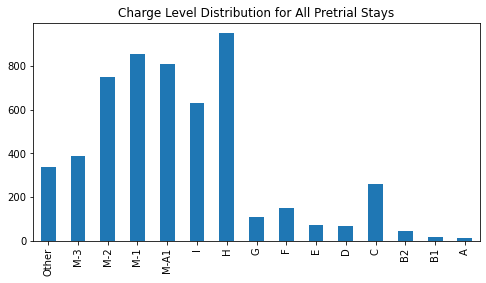

In [26]:
b.plot.bar(title='Charge Level Distribution for All Pretrial Stays', figsize=[8,4])
plt.savefig('/Users/ejaxon/development/jail/charge-level-distribution-all-pretrial-stays.png', bbox_inches='tight')

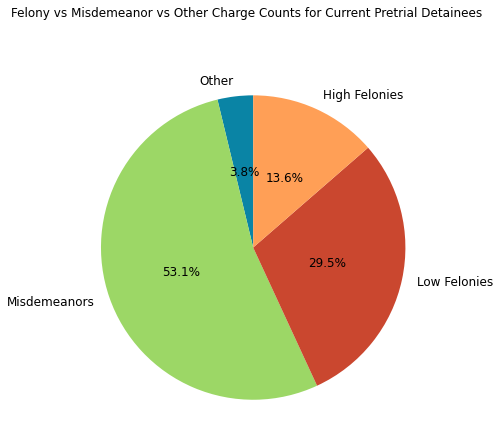

In [15]:
colors = ['#0a84a5', '#9cd766', '#ca472f', '#ff9f56', '#8cddd0', '#f6c85f', '#6f4d7c', ]
bsum = b.iloc[0]
bsum = b.iloc[1:5].sum()
bsum = b.iloc[5:].sum()
bsum = pd.DataFrame([b.iloc[0], b.iloc[1:5].sum(), b.iloc[5:7].sum(), b.iloc[7:].sum()])
bsum.columns = ['']
bsum.index = ['Other', 'Misdemeanors', 'Low Felonies', 'High Felonies']
bsum
bsum.plot.pie(subplots=True, legend=False, autopct='%1.1f%%', figsize=[7,7],
              startangle=90, fontsize=12, pctdistance=.5, colors=colors,
#              counterclock=False,
              title='Felony vs Misdemeanor vs Other Charge Counts for Current Pretrial Detainees')
plt.savefig('/Users/ejaxon/development/jail/charge-type-distribution-all-pretrial-stays.png', bbox_inches='tight')


<AxesSubplot:title={'center':'Charge Level Distribution for All Pretrial Stays'}>

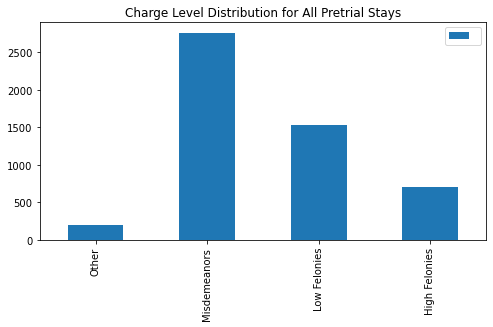

In [16]:
bsum.plot.bar(title='Charge Level Distribution for All Pretrial Stays', figsize=[8,4])